[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP 417 - PARTE C - HANDS-ON 03


* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


Alternativa: Incorporar aqui o módulo de geração de ST $1/f$ do Hands-On2

Caracterização Espectral de Processos Estocásticos (PSD + DFA  e  MFSS)

# Step 1 

## (CARACTERIZACAO VIA ESPECTRO DE POTÊNCIAS - PSD E DFA): 

Dataframe 1.a. - Série de vento solar com 4096 pontos enviada pelo professor como dataset teste (Sw4096.csv).

Dataframe 1.b. - baixar serie temporal recomendada pelo professor via e-mail.

Aplicar na série 1.b. - o algoritmo **specplus.py** (calcula espectros PSD e DFA). **Antes porém**, para se familiarizar com ambos, rode os algoritmos sobre a série de teste 1.c, Sw4096.csv, enviada pelo email.  

Note que, a versão do 1o algoritmo **specplus.py** se aplica apenas em dados no formato .txt. Dessa forma, está incluido um modulo em python para transformar o arquivo .txt em . csv. (módulo que pode ser útil em futuras aplicações). 

Aplique ambos os algorítmos sobre o Dataframe 1.b. Salve o output. Você pode modificar o código **specplus.py** para ler diretamente o formato .csv (isso vale um bonus de 0.1 na nota final da parte C). 




Bibliotecas e Comandos Necessários:

In [ ]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import colorednoise as cn
from matplotlib.pyplot import figure
#%matplotlib inline

#Cloning Computational Statistics Repository
!git clone 'https://github.com/barauna-lo/Computational_Statistics.git' 
# % cd ..


In [ ]:
%cd Computational_Statistics/ 

/content/Computational_Statistics


In [ ]:
import SpecplusV02 as specplus #import function
import MFDFA as mfdfa
# #Get out of the folders
% cd ..

/content


## Generating Time Series
Here I will generate all classes of times series that we have beem work on the last Hands On. The main functions that we use for genetare `pmodel` was insert in the `SpecplusV02.py` code. That will get this notebook quitely clean and also help me to learn how to use subroutines and build my privet librays  

In [ ]:
#Solar Wind Data
! gdown --id 11JsT9g6eHR5nVcSaHXpEGHfytypimODa
swind = pd.read_csv('SW4096frontiers.csv')
swind.rename(columns = {'600':'swind'}, inplace = True)
#Add more two values in the data frame for the have 2**12 data points
df2 = {'swind': swind['swind'].values[-2],'swind':swind['swind'].values[-1]}
swind = swind.append(df2, ignore_index = True)

#Serie1
! gdown --id "15Jq2-f3oAIK3s0YQ22HM0FF0Zfew7ICs"
serie1 = pd.read_csv('serie1.csv')
serie1.rename(columns = {'0.0':'serie1'}, inplace = True)
#Add more two values in the data frame for the have 2**12 data points
df2 = {'serie1': serie1['serie1'].values[-2],'serie1':serie1['serie1'].values[-1]}
serie1 = serie1.append(df2, ignore_index = True)

len_size = len(swind)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11JsT9g6eHR5nVcSaHXpEGHfytypimODa
To: /content/SW4096frontiers.csv
100% 16.4k/16.4k [00:00<00:00, 17.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15Jq2-f3oAIK3s0YQ22HM0FF0Zfew7ICs
To: /content/serie1.csv
100% 84.1k/84.1k [00:00<00:00, 39.6MB/s]


In [ ]:
#Alternativa 
# GERANDO SÉRIES TEMPORAIS DE RUÍDOS COLORIDOS
colorData = pd.DataFrame()
#SetUp a noise class
beta,dataSize = [0.2,1,2],len_size 
#beta,dataSize = [0,1,2],2**10
#Creat dataSize
for i in range(len(beta)): colorData.insert(i,'beta'+str(i),cn.powerlaw_psd_gaussian(beta[i],dataSize))#,random_state=8666)) #insert new collums

In [ ]:
#Gerando Séries Exógenas Utilizando o p-model
import numpy as np
import pandas as pd
pserie=[]
for i in range(3):
    A,B  = specplus.pmodel(len_size, np.random.uniform(0.675,0.975), np.random.uniform(0.65,0.75))
    C=(A - np.mean(A)) / np.std(A)
    pserie.append(C)

exoData = pd.DataFrame() #Criando um espaço de dataframa
for i in range(len(pserie)): exoData.insert(i,'exo'+str(i),pserie[i]) #Alocando as séries    

In [ ]:
# One dataframe to rule than all 💍
df = pd.concat([colorData,exoData,serie1,swind], axis=1,join='inner')
df

,beta0,beta1,beta2,exo0,exo1,exo2,serie1,swind
0,-0.179721,0.603061,-1.977680,0.318214,0.039803,-0.046865,0.078384,588
1,-1.045108,0.307955,-1.997213,-0.517113,-0.047909,0.032746,0.080945,590
2,0.597943,0.928349,-1.959117,-0.242105,0.048186,-0.028368,0.201019,582
3,0.541752,0.960308,-2.018117,-0.161322,-0.046700,-0.013332,-0.043598,566
4,0.473906,1.322071,-2.067663,-0.833594,0.004673,-0.031193,0.082275,576
...,...,...,...,...,...,...,...,...
4091,-0.977881,0.525526,-2.030531,-0.206830,-0.040736,0.031846,0.181332,335
4092,-0.349868,1.150713,-1.945542,-0.769603,0.042067,-0.039185,0.102945,360
4093,-1.926834,0.504980,-1.983638,2.350639,-0.042231,0.031804,0.229651,357
4094,0.017184,0.733732,-2.113365,-0.366675,0.031590,-0.038194,0.155548,367


## Ploting all Data Series
Lets take a look on the data

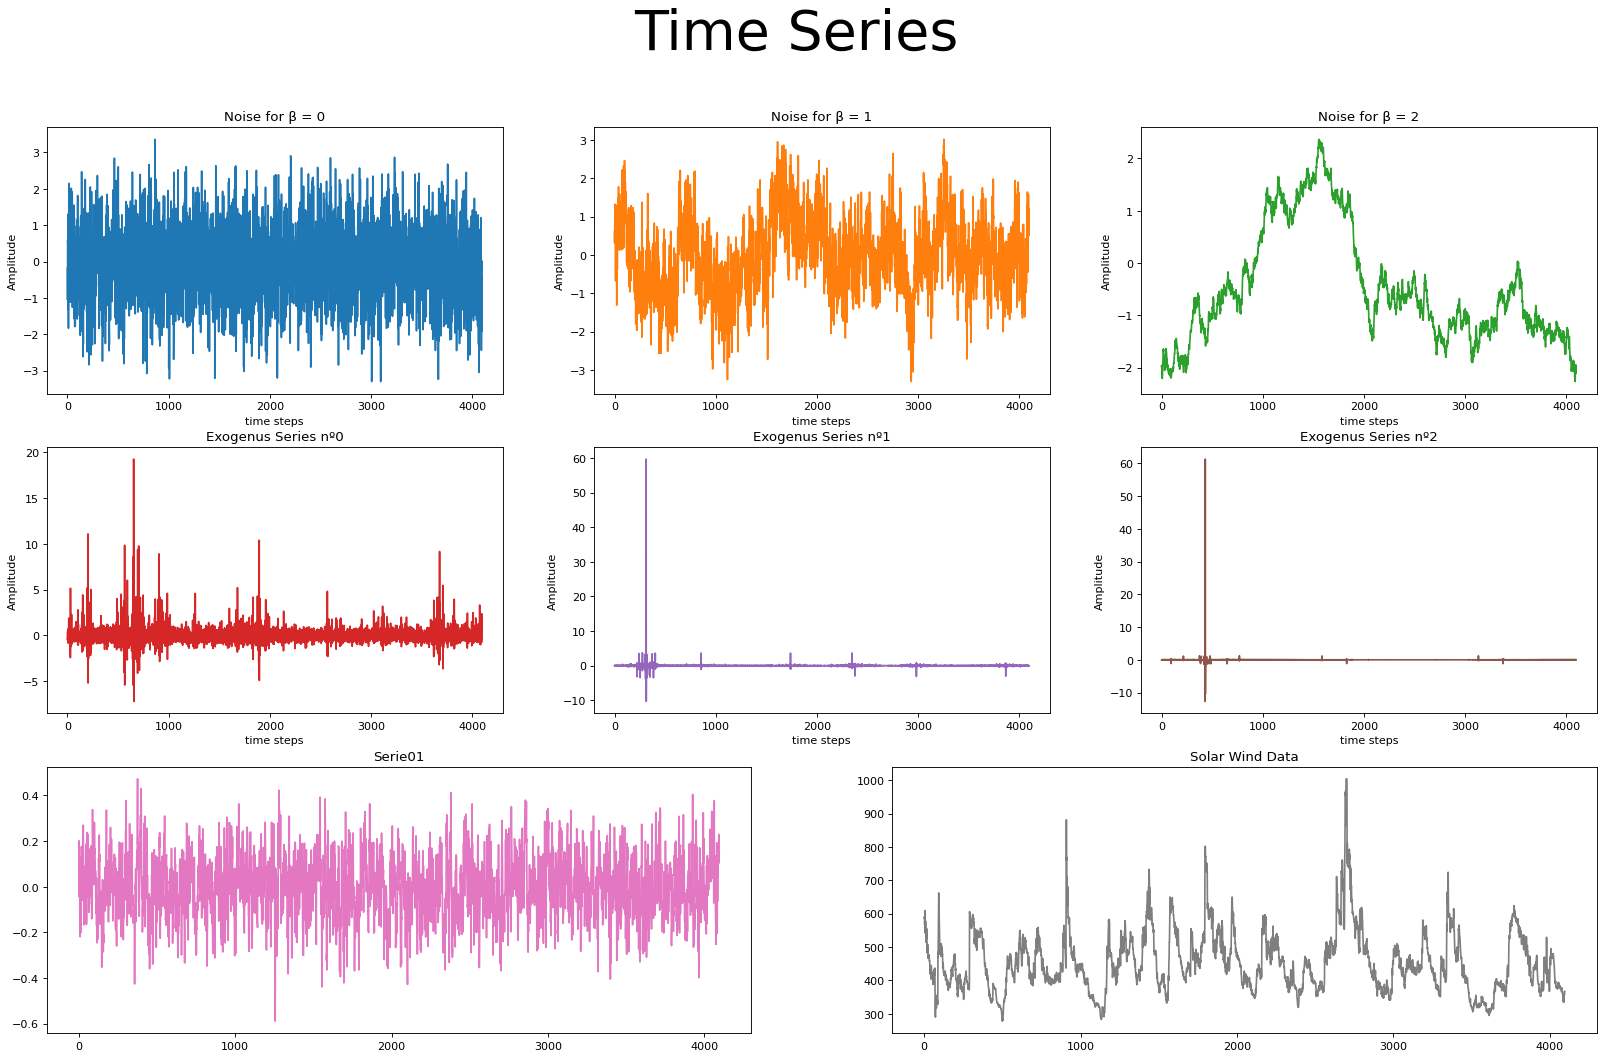

In [ ]:
figure(figsize=(25,15),dpi=80)
cor = ['C0','C1','C2','C3','C4','C5','C6','C7']
plt.suptitle("Time Series",size=50)

for i in range(3):
    plt.subplot(3,3,(i+1))
    plt.plot(df['beta'+str(i)],color=cor[i])
    plt.title('Noise for β = '+df.columns[i][-1])
    plt.xlabel('time steps')
    plt.ylabel('Amplitude')

for i in range(3):
    plt.subplot(3,3,(i+4))
    plt.plot(df['exo'+str(i)],color=cor[i+3])
    plt.title('Exogenus Series nº'+df.columns[i][-1])
    plt.xlabel('time steps')
    plt.ylabel('Amplitude')


plt.subplot(3,2,5)
plt.plot(df['serie1'],color=cor[6])
plt.title('Serie01')

plt.subplot(3,2,6)
plt.plot(df['swind'],color=cor[7])
plt.title('Solar Wind Data')



plt.show()

Importação das Séries Temporais para este notebook:

# Task 01: 
Calcular $\gamma_1$

$$ \gamma_1 = \frac{2}{7} (\bar{\alpha}-\beta) $$


In [ ]:
columns = df.columns #Extracting colluns names
gamma1 = []
for i in range(len(columns)): 
    gamma1.append(specplus.gamma1(df[columns[i]])[2])
    print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))

γ1 de beta0 =  0.22138
γ1 de beta1 =  0.56615
γ1 de beta2 =  1.01441
γ1 de exo0 =  -0.15738
γ1 de exo1 =  -0.11707
γ1 de exo2 =  -0.10515
γ1 de serie1 =  0.42749
γ1 de swind =  0.9381


# STEP 02:
CARACTERIZAÇÃO VIA ESPECTRO MULTIFRACTAL

Algoritmo MFDFA.py (com 5 módulos separados) para obtenção do espectro multifractal de singularidade (deve ser aplicado sobre o formato .csv).

Para fins de familiarização, rode o algoritmo primeiramente sobre o dataframe 1 e obtenha o valor de Delta_Alpha=dalpha) ~  0.87.

Aplique sobre o dataframe 1.b e obtenha o valor de dalpha. Compare com o dalpha aplicado sobre o dataframe 1.a e verifique qual tem maior multifractalidade (maior dalpha).


# Multifractal Singularity Spectra (MFSS) 

via MFDFA.py (Módulos A, B, C, D e E)



# Task 02: 
Calcular $\gamma_2$



---



In [ ]:
import MFDFA as mfdfa

gamma2,dalpha = [],[]
for i in range(len(columns)): 
    gamma2.append(mfdfa.gamma2(df[columns[i]])[0])
    dalpha.append(mfdfa.gamma2(df[columns[i]])[1])
    print(columns[i]+' - Δα %g, γ2 %g' % (mfdfa.gamma2(df[columns[i]])[1] ,mfdfa.gamma2(df[columns[i]])[0]))
    #print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))


beta0 - Δα 0.655715, γ2 0.437143
beta1 - Δα 0.578764, γ2 0.385843
beta2 - Δα 0.571397, γ2 0.380931
exo0 - Δα 0.809053, γ2 0.539369
exo1 - Δα 1.17107, γ2 0.780711
exo2 - Δα 1.72221, γ2 1.14814
serie1 - Δα 0.591651, γ2 0.394434
swind - Δα 0.887617, γ2 0.591745


# Task 03:

Janelamento + plotagem gamma 1 x gamma 2.



---



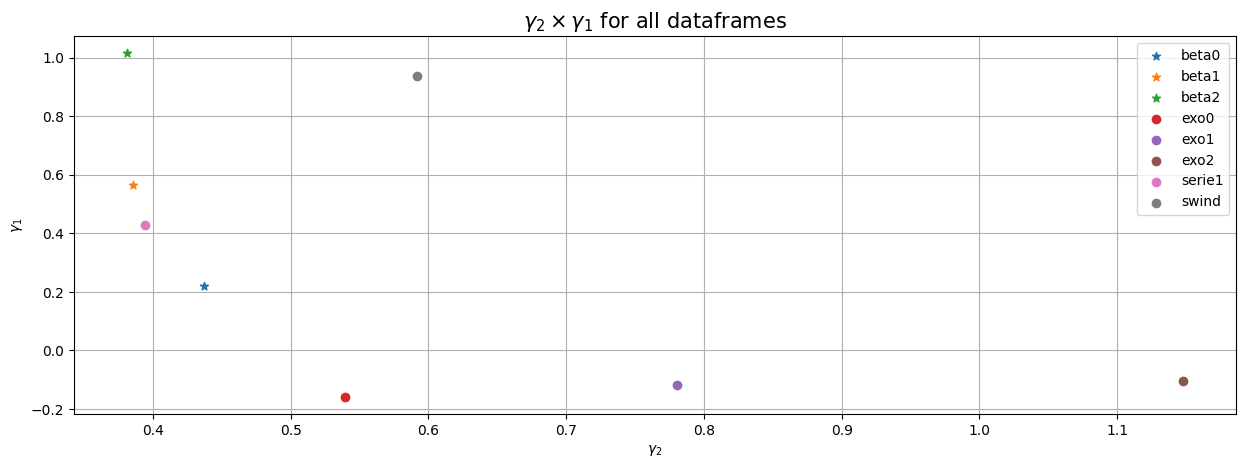

In [ ]:
figure(figsize=(15,5),dpi=100)

markers = ['*','*','*','o','o','o','o','o',]
for i in range(len(columns)):
    plt.scatter(gamma2[i],gamma1[i],label=columns[i],color='C'+str(i),marker=markers[i])
plt.legend()
plt.grid()
plt.xlabel(r'$\gamma_2$')
plt.ylabel(r'$\gamma_1$')
plt.title(r'$\gamma_2 \times \gamma_1$ for all dataframes',size=15)
plt.show()

## Janelamento

Para realizarmos o _"Janelamento"_ iremos dividir nossa série temporal 4 partes. Então calcularemos os valores de $\gamma_1$ e $\gamma_2$ para cada janeja daquela série temporal

In [ ]:
# PRECISA SER AUTOMATIZADO
window = int(len(df)/4)
# splitting dataframe by row index
df_1 = df.iloc[:window,:]
df_2 = df.iloc[window:2*window,:]
df_3 = df.iloc[2*window:3*window,:]
df_4 = df.iloc[3*window:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

#Alocating new gamma1 and gamma2
gamma1_win1,gamma1_win2,gamma1_win3,gamma1_win4= [],[],[],[]
gamma2_win1,gamma2_win2,gamma2_win3,gamma2_win4 = [] , [] , [] , []
dalpha_win1,dalpha_win2,dalpha_win3,dalpha_win4 = [] , [] , [] , []
for i in range(len(columns)): 
    gamma1_win1.append(specplus.gamma1(df_1[columns[i]])[2])
    gamma1_win2.append(specplus.gamma1(df_2[columns[i]])[2])
    gamma1_win3.append(specplus.gamma1(df_3[columns[i]])[2])
    gamma1_win4.append(specplus.gamma1(df_4[columns[i]])[2])
    
    gamma2_win1.append(mfdfa.gamma2(df_1[columns[i]])[0])
    gamma2_win2.append(mfdfa.gamma2(df_2[columns[i]])[0])
    gamma2_win3.append(mfdfa.gamma2(df_3[columns[i]])[0])
    gamma2_win4.append(mfdfa.gamma2(df_4[columns[i]])[0])



Shape of new dataframes - (1024, 8) , (1024, 8)


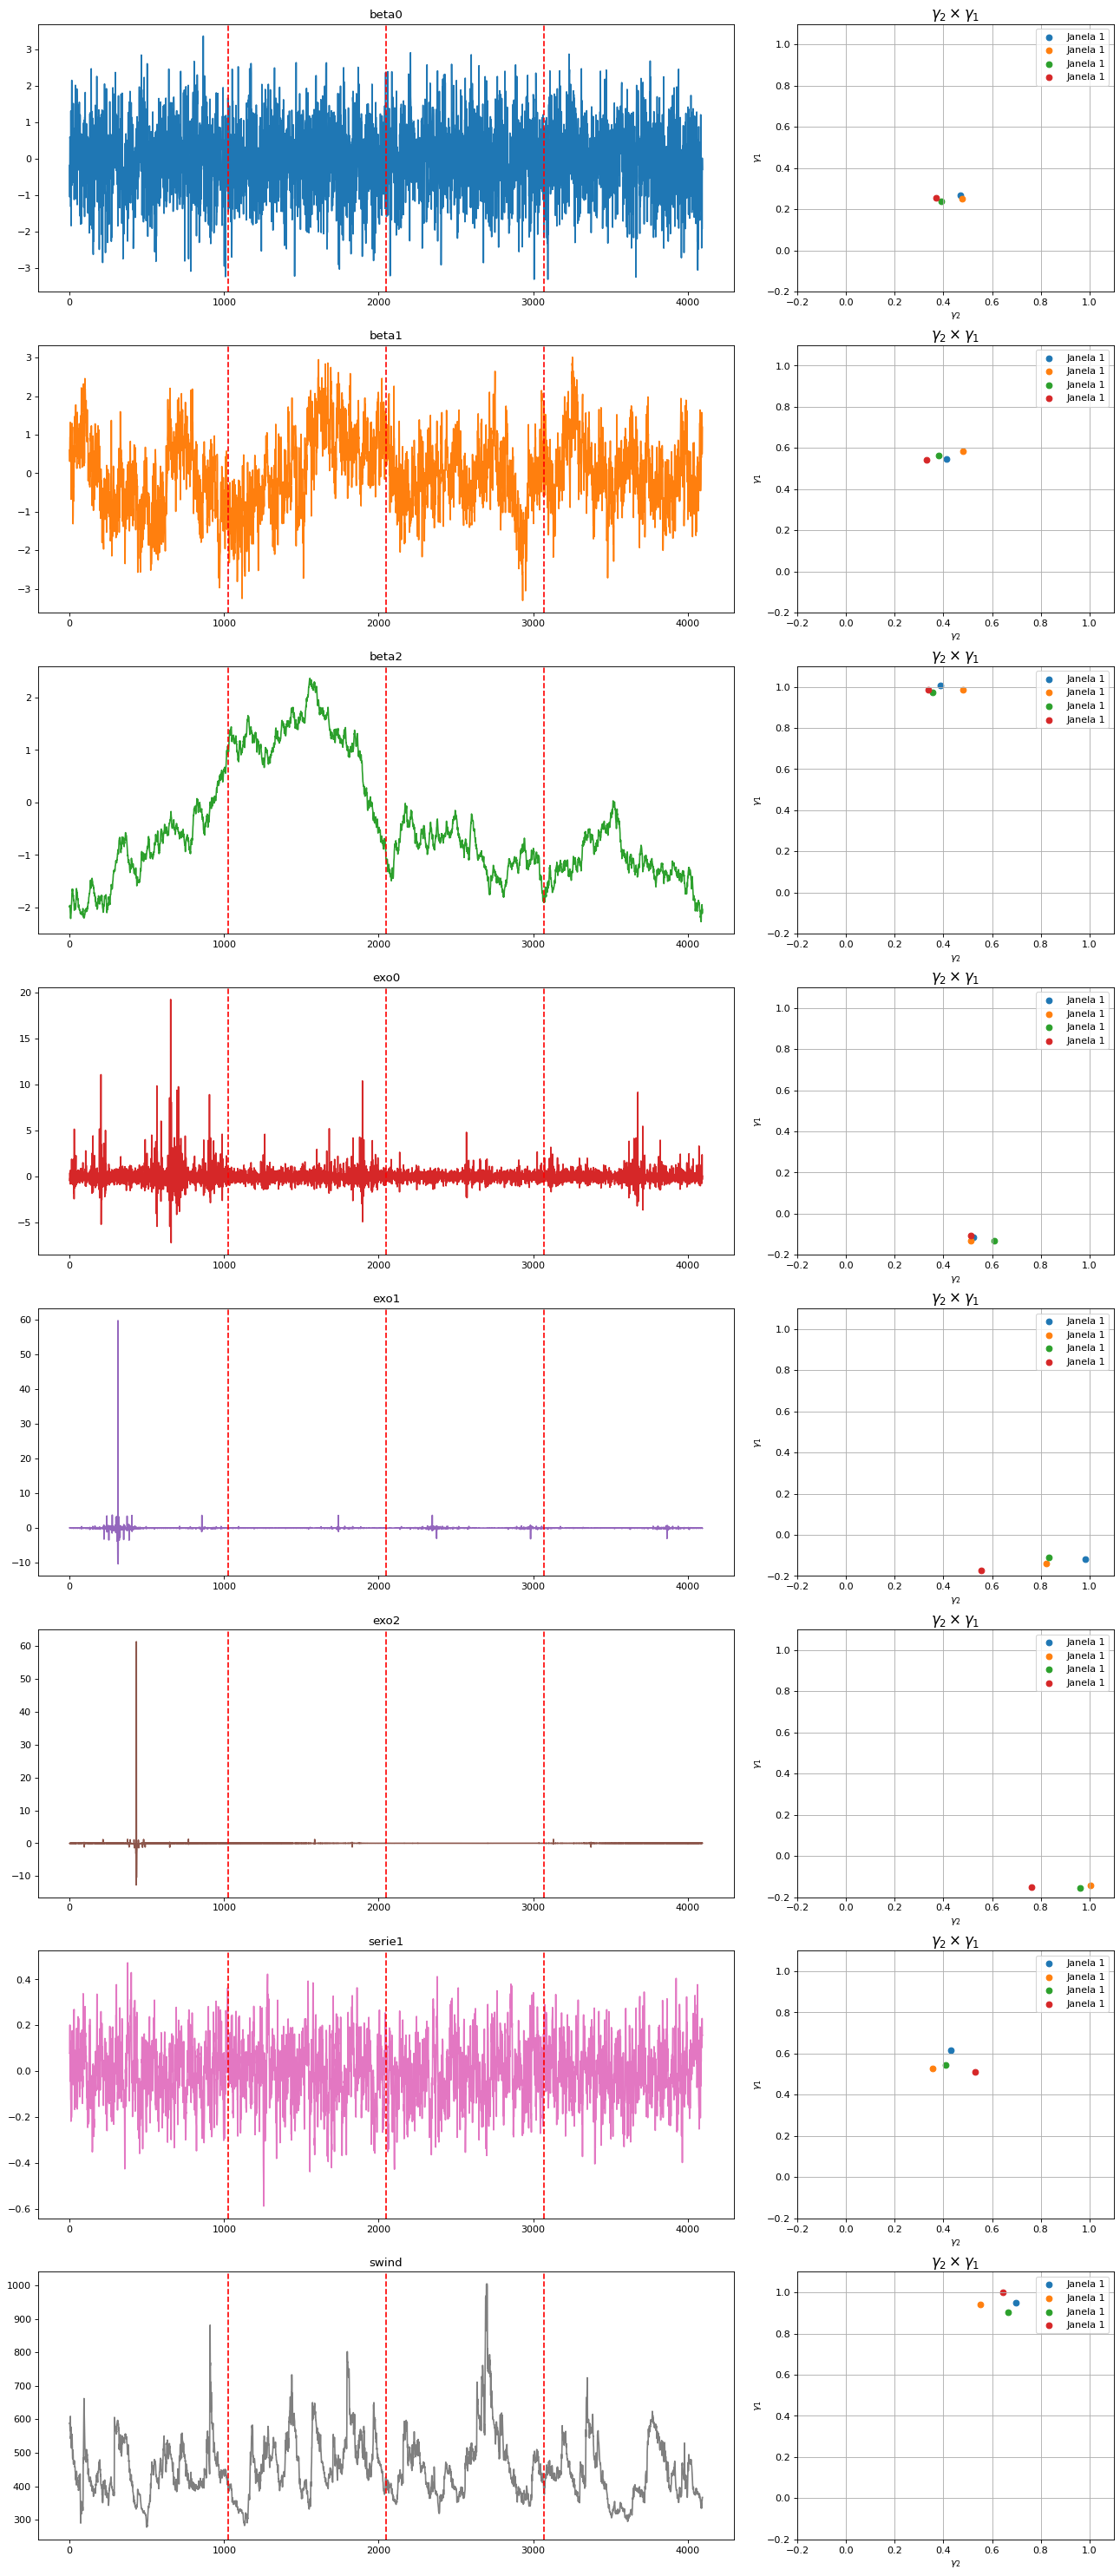

In [ ]:
char_lines = len(columns)
char_colum = 3
figure(figsize=(20,6*char_lines),dpi=80)

i=0
for i in range(char_lines):
    plt.subplot(char_lines,char_colum,((3*i+1,3*i+2)))
    plt.plot(df[columns[i]],color=cor[i])
    plt.axvline(x=window,color='red',linestyle='--')
    plt.axvline(x=2*window,color='red',linestyle='--')
    plt.axvline(x=3*window,color='red',linestyle='--')
    plt.title(columns[i])

    plt.subplot(char_lines,char_colum,(3*(i+1)))
    plt.scatter(gamma2_win1[i],gamma1_win1[i],label='Janela 1')
    plt.scatter(gamma2_win2[i],gamma1_win2[i],label='Janela 1')
    plt.scatter(gamma2_win3[i],gamma1_win3[i],label='Janela 1')
    plt.scatter(gamma2_win4[i],gamma1_win4[i],label='Janela 1')
    plt.title(columns[i])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\gamma_2$')
    plt.ylabel(r'$\gamma_1$')
    plt.title(r'$\gamma_2 \times \gamma_1$',size=15)
    plt.xlim(-0.2,1.1)
    plt.ylim(-0.2,1.1)

#plt.suptitle(r'$\gamma_2 \times \gamma_1$ for each time series window',size=30)  
plt.show()





---



# Task Extra 
Complet Data Analyse for all tools allready used


Data Analysis for 3DBMO simulations...

Original time series data (4096 points): 

First 10 points: [-0.17972101 -1.0451084   0.59794277  0.54175174  0.47390586  0.4534857
  0.4470591  -1.311872    1.3073342  -0.2487687 ]


1. Plotting time series data...
2. Plotting Power Spectrum Density...  beta =-0.18688448702889804
alfa = 0.5879468124438396
3. Plotting Detrended Fluctuation Analysis...


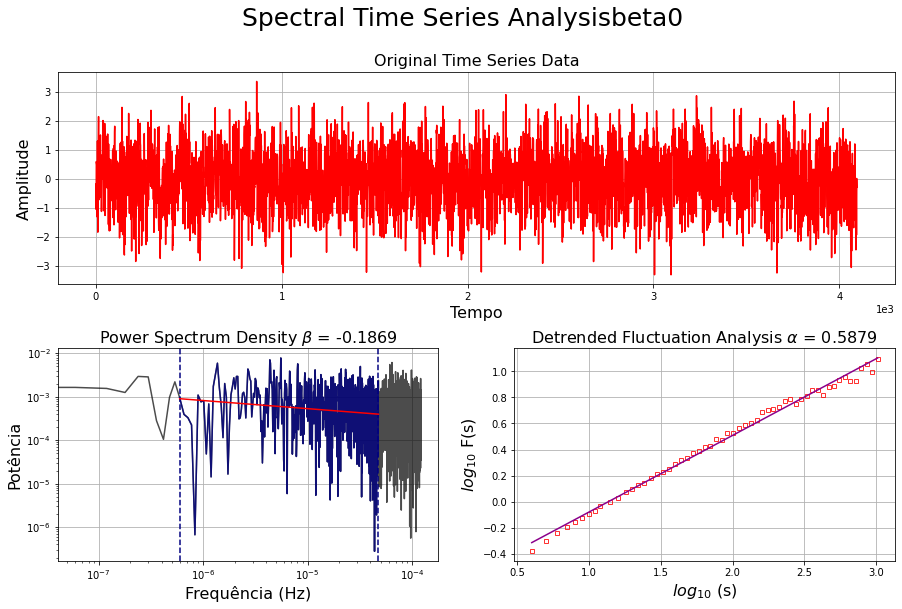

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


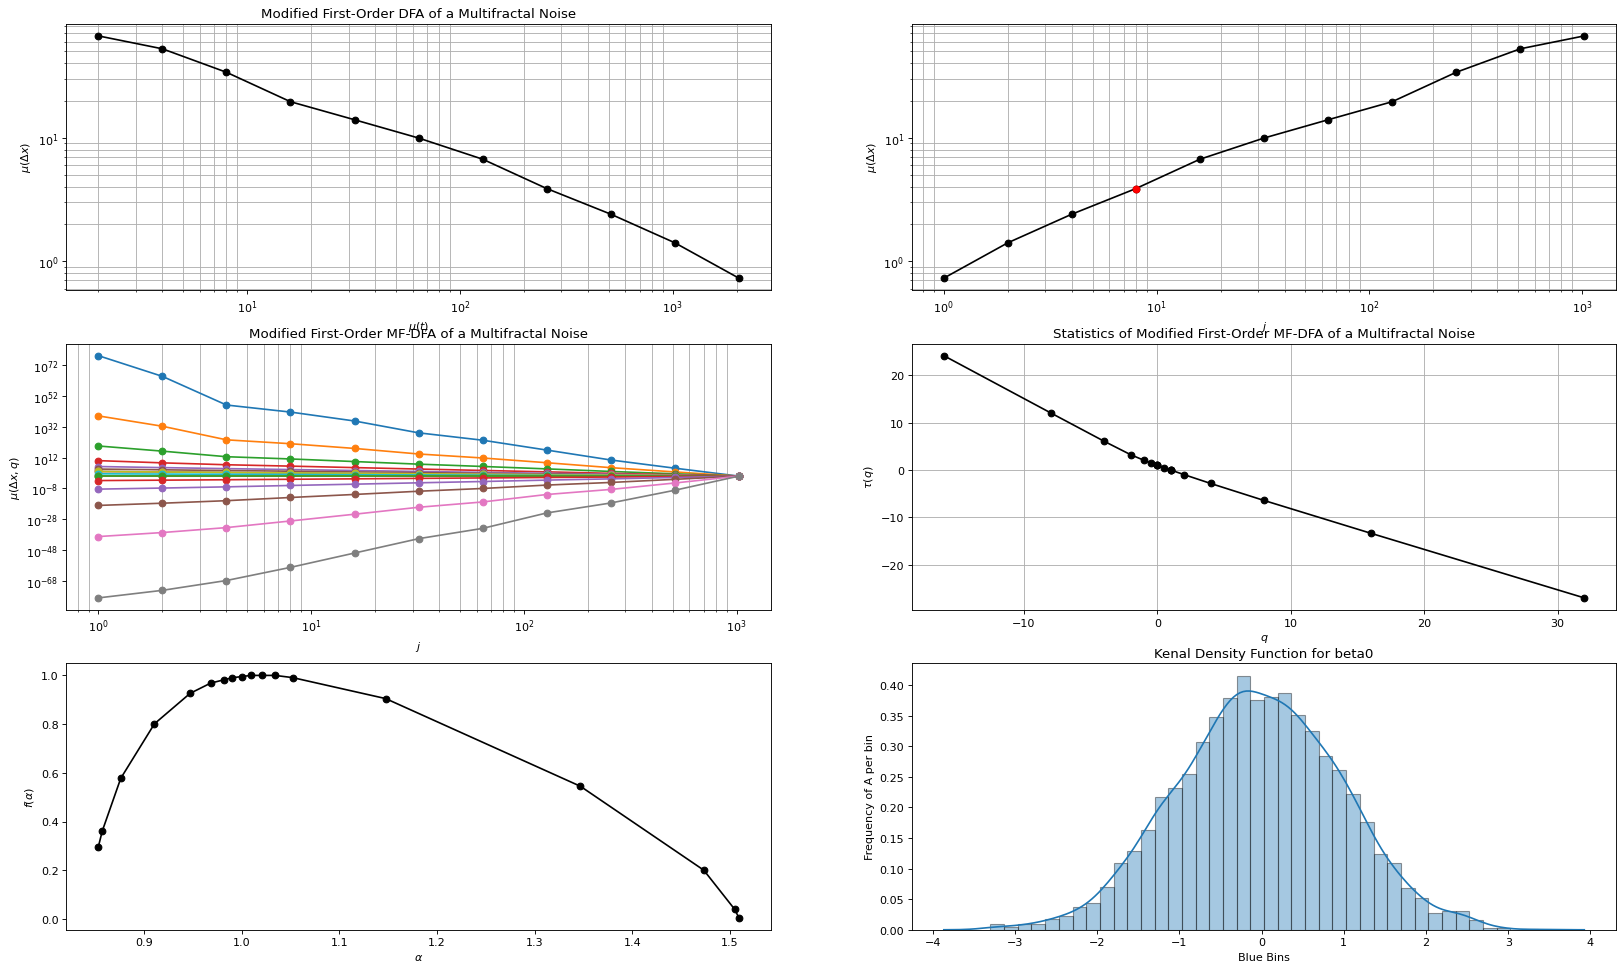

alpha_min = 0.853405, alpha_max = 1.50912, dalpha = 0.655715
h_min = 0.812892, h_max = 1.57194, dh = 0.759046



In [ ]:


i=0

dx = df[columns[i]]
specplus.main(dx,columns[i])

[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2
[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)
# Modified first-order MF-DFA
[_, dataMeasure, _, stats, q] = mfdfa.getMSSByUpscaling(dx, isNormalised = 1)


# Modified first-order DFA
[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)


# Output
# Modified first-order DFA
figure(figsize=(25,15),dpi=80)
plt.subplot(3, 2, 1)
plt.loglog(timeMeasure, meanDataMeasure, 'ko-')
plt.xlabel(r'$\mu(t)$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order DFA of a Multifractal Noise')

plt.subplot(3, 2, 2)
plt.loglog(scales, meanDataMeasure, 'ko-')
plt.loglog(bScale, bDM, 'ro')
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')

# Modified first-order MF-DFA

plt.subplot(3, 2, 3)
nq = np.int(len(q))
leg_txt = []
for qi in range(1, nq + 1):
    llh = plt.loglog(scales, dataMeasure[qi - 1, :], 'o-')
    leg_txt.append('tau = %g (q = %g)' % (stats['tau'][qi - 1], q[qi - 1]))
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x, q)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order MF-DFA of a Multifractal Noise')
#plt.legend(leg_txt)


plt.subplot(3, 2, 4)
plt.plot(q, stats['tau'], 'ko-')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.grid('on', which = 'major')
plt.title('Statistics of Modified First-Order MF-DFA of a Multifractal Noise')


plt.subplot(3, 2, 5)
plt.plot(stats['LH'], stats['f'], 'ko-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
# plt.grid('on', which = 'major')

plt.subplot(3, 2, 6)
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Kenal Density Function for '+columns[i])
#specplus.cullenfreyGEV(dx)


plt.show()

#PRINTING SPECTRUM PARAMETERS
print('alpha_min = %g, alpha_max = %g, dalpha = %g' % (stats['LH_min'], stats['LH_max'], stats['LH_max'] - stats['LH_min']))
print('h_min = %g, h_max = %g, dh = %g\n' % (stats['h_min'], stats['h_max'], stats['h_max'] - stats['h_min']))






---

